In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3]:
dro_clm = ['Loan_ID']
df.drop(dro_clm, axis=1, inplace=True)

In [4]:
df = df.dropna()
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

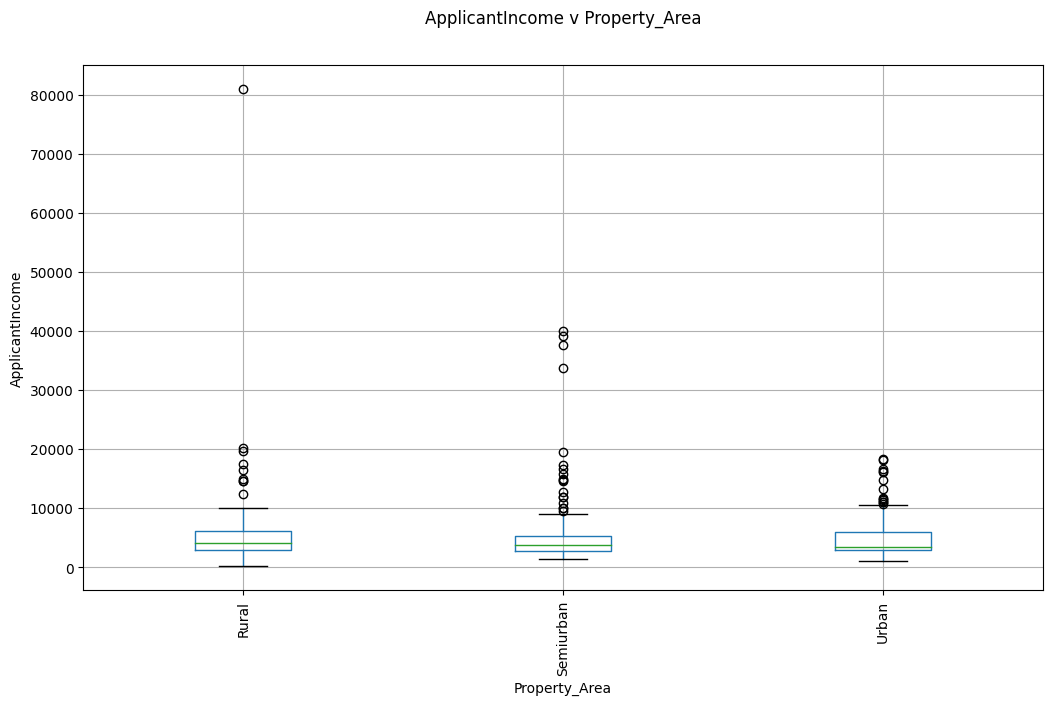

In [5]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df.boxplot ('ApplicantIncome', 'Property_Area', ax=ax)
plt.suptitle('ApplicantIncome v Property_Area')
plt.title('')
plt.ylabel('ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

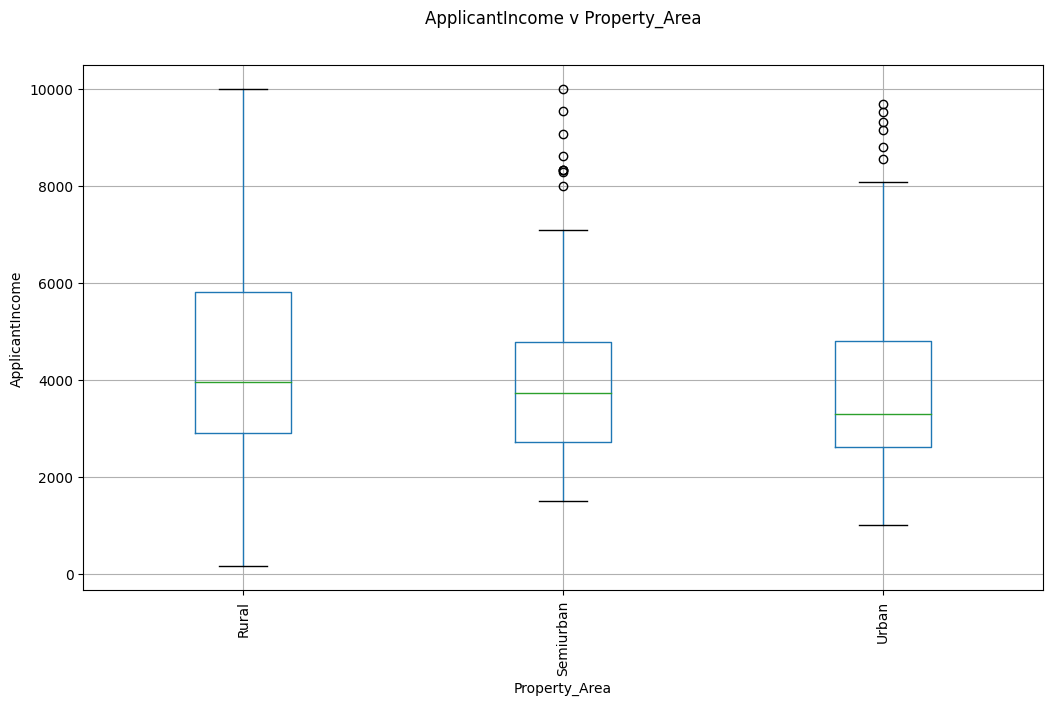

In [6]:
df = df[df["ApplicantIncome"] <= 10000]
df = df[df["ApplicantIncome"] >= 0]
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df.boxplot ('ApplicantIncome', 'Property_Area', ax=ax)
plt.suptitle('ApplicantIncome v Property_Area')
plt.title('')
plt.ylabel('ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

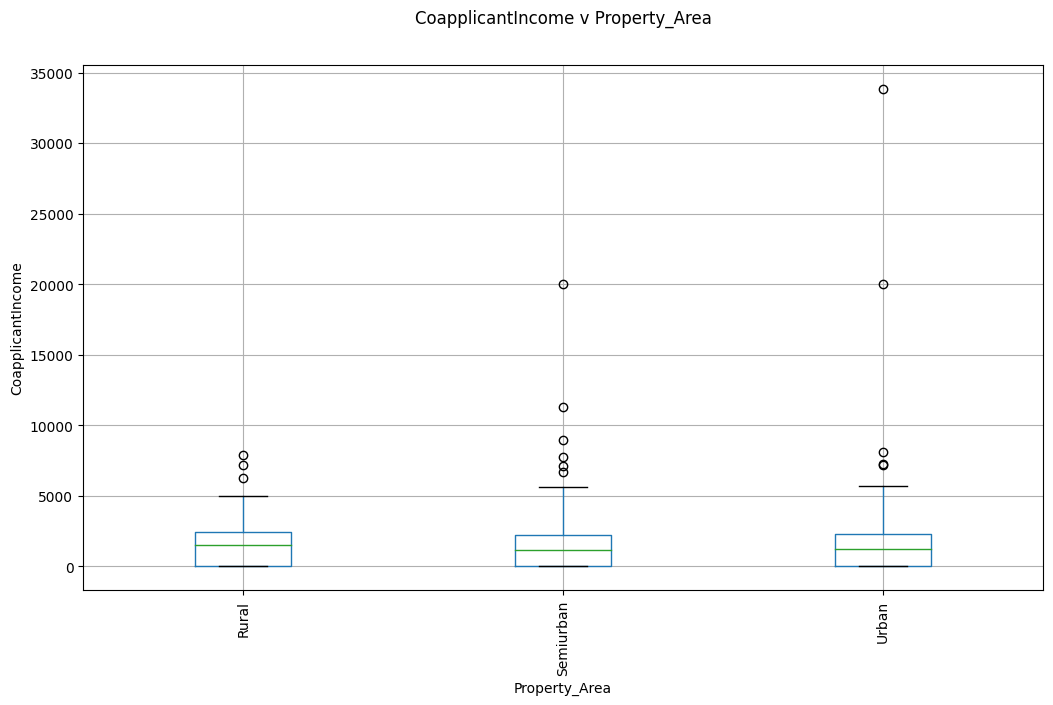

In [7]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df.boxplot ('CoapplicantIncome', 'Property_Area', ax=ax)
plt.suptitle('CoapplicantIncome v Property_Area')
plt.title('')
plt.ylabel('CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

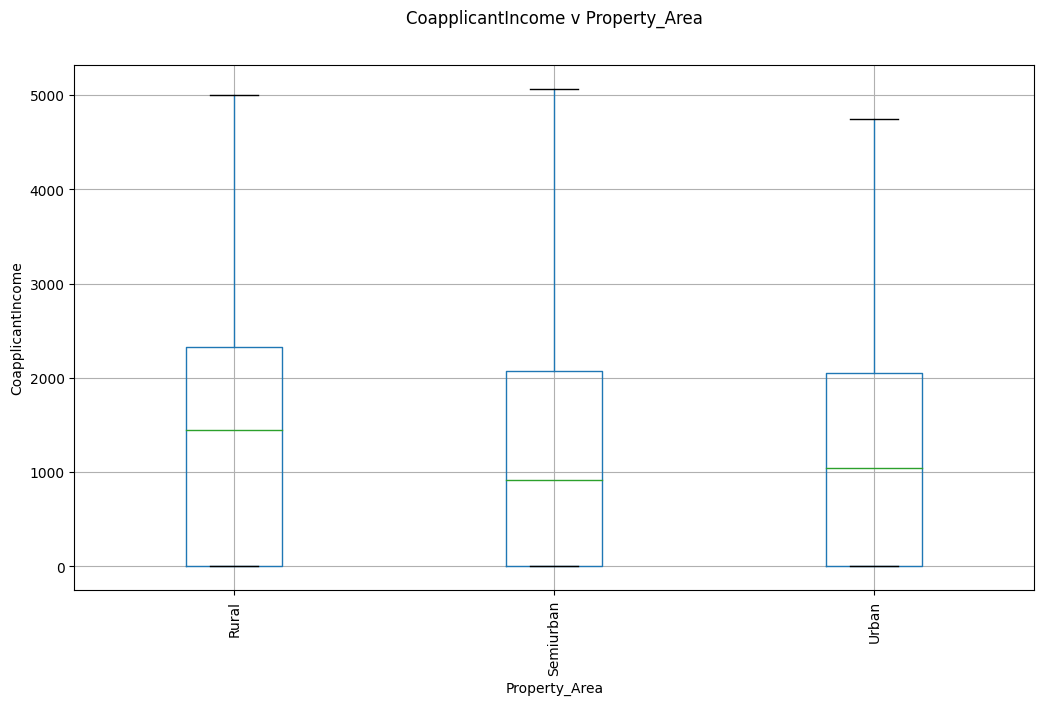

In [8]:
df = df[df["CoapplicantIncome"] <= 5100]
df = df[df["CoapplicantIncome"] >= 0]
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df.boxplot ('CoapplicantIncome', 'Property_Area', ax=ax)
plt.suptitle('CoapplicantIncome v Property_Area')
plt.title('')
plt.ylabel('CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

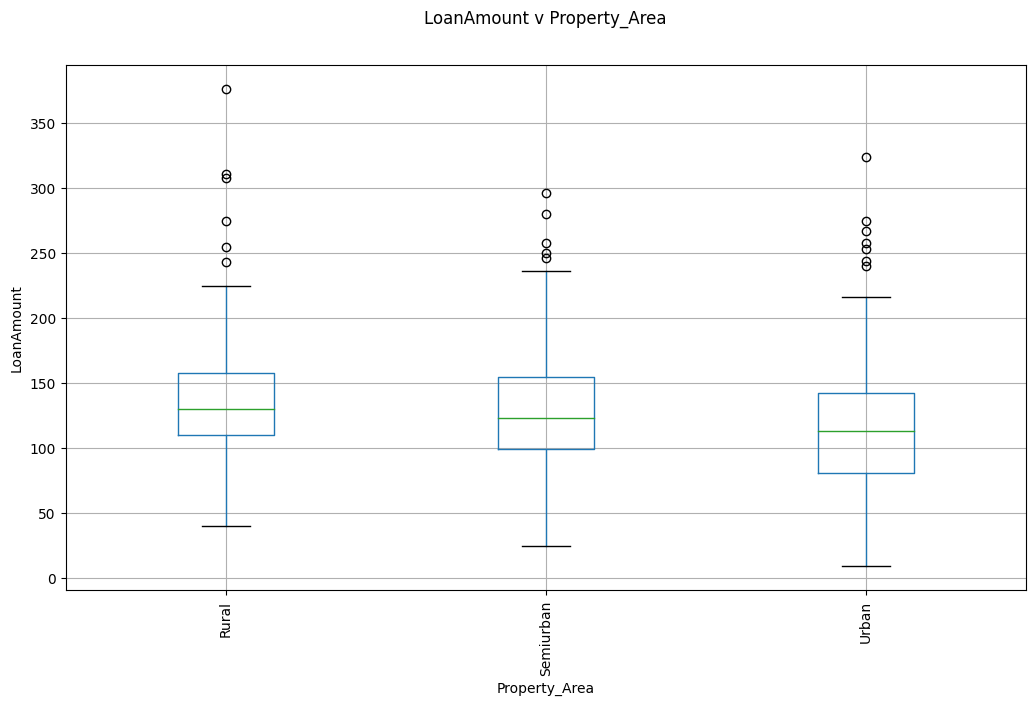

In [9]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df.boxplot ('LoanAmount', 'Property_Area', ax=ax)
plt.suptitle('LoanAmount v Property_Area')
plt.title('')
plt.ylabel('LoanAmount')
plt.xticks(rotation=90)
plt.show()

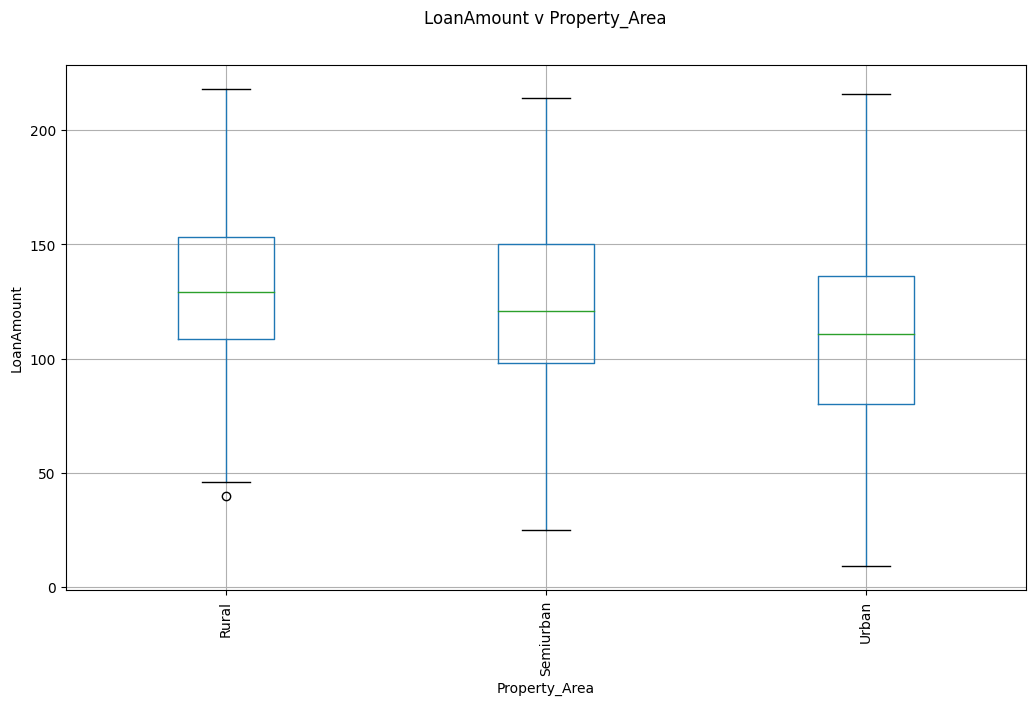

In [10]:
df = df[df["LoanAmount"] <= 220]
df = df[df["LoanAmount"] >= 0]
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df.boxplot ('LoanAmount', 'Property_Area', ax=ax)
plt.suptitle('LoanAmount v Property_Area')
plt.title('')
plt.ylabel('LoanAmount')
plt.xticks(rotation=90)
plt.show()

In [11]:
unique_value_counts = df['Loan_Amount_Term'].value_counts().reset_index()
unique_value_counts.columns = ['Unique_Value', 'Count']
print("Unique Values and Counts:")
print(unique_value_counts)

Unique Values and Counts:
   Unique_Value  Count
0         360.0    338
1         180.0     29
2         480.0     12
3         300.0      7
4         120.0      3
5          84.0      3
6         240.0      2
7          36.0      2
8          60.0      1


In [12]:
df = df[df["Loan_Amount_Term"] != 120]
df = df[df["Loan_Amount_Term"] != 84]
df = df[df["Loan_Amount_Term"] != 240]
df = df[df["Loan_Amount_Term"] != 36]
df = df[df["Loan_Amount_Term"] != 60]
unique_value_counts = df['Loan_Amount_Term'].value_counts().reset_index()
unique_value_counts.columns = ['Unique_Value', 'Count']
print("Unique Values and Counts:")
print(unique_value_counts)

Unique Values and Counts:
   Unique_Value  Count
0         360.0    338
1         180.0     29
2         480.0     12
3         300.0      7


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,386.000000,386.000000,386.000000,386.000000,386.000000
mean,3992.795337,1249.507565,122.189119,349.119171,0.849741
std,1799.424649,1319.075193,39.854123,53.255096,0.357789
min,150.000000,0.000000,9.000000,180.000000,0.000000
25%,2700.500000,0.000000,99.000000,360.000000,1.000000
50%,3595.000000,1252.500000,120.000000,360.000000,1.000000
75%,4719.250000,2153.250000,148.750000,360.000000,1.000000
max,10000.000000,5064.000000,218.000000,480.000000,1.000000


In [14]:
df['Dependents'].unique()

array(['1', '0', '3+', '2'], dtype=object)

In [15]:
df['Dependents'] = df['Dependents'].apply(lambda x: x.replace('+', '') if '+' in x else x)
df['Dependents'].unique()

array(['1', '0', '3', '2'], dtype=object)

In [16]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Married'].unique()

array([1, 0], dtype=int64)

In [17]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Education'].unique()

array([1, 0], dtype=int64)

In [18]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [19]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'].unique()

array([1, 0], dtype=int64)

In [20]:
dummies = pd.get_dummies(df.Property_Area)
dummies.head(3)

,Rural,Semiurban,Urban
1,True,False,False
2,False,False,True
3,False,False,True


In [21]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('Property_Area',axis='columns')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,True,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,False,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,False,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,False,False,True
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Y,False,False,True


In [22]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Loan_Status'].unique()

array([0, 1], dtype=int64)

In [23]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True


In [24]:
df.shape

(386, 14)

In [25]:
X = df.drop(['Loan_Status'],axis='columns')
y = df['Loan_Status']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [27]:
from sklearn.linear_model import LogisticRegression

reg =  LogisticRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8205128205128205

In [28]:
from sklearn.linear_model import SGDClassifier
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)
sgd.score(X_test,y_test)

0.717948717948718

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.6282051282051282

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
y_pred=rfm.predict(X_test)
rfm.score(X_test,y_test)

0.7564102564102564

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.7307692307692307

In [32]:
from sklearn.svm import SVC
svm =  SVC()
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
svm.score(X_test,y_test)

0.717948717948718

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, method_name):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy score
    score = accuracy_score(y_test, y_pred)
    
    # Display the results
    result = {
        'Method': method_name,
        'Classifier': classifier,
        'Score': score
    }
    
    return result

# Example usage
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(loss='modified_huber', shuffle=True, random_state=101),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=15),
    'SVM': SVC()
}

results = []

for method_name, classifier in classifiers.items():
    result = train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, method_name)
    results.append(result)

# Display results
for result in results:
    print(f"Method: {result['Method']}")
    print(f"Score: {result['Score']:.4f}")
    print()


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: Logistic Regression
Score: 0.8205

Method: SGD Classifier
Score: 0.7179

Method: Decision Tree
Score: 0.6538

Method: Random Forest
Score: 0.8077

Method: K-Nearest Neighbors
Score: 0.7308

Method: SVM
Score: 0.7179



In [34]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,True,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,False,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,False,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,False,False,True
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,True,False,False
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,True,False,False
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,True,False,False
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,False,False,True


In [35]:
import numpy as np
def predict_price(Property_Area,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History):    
    loc_index = np.where(X.columns==Property_Area)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Gender
    x[1] = Married
    x[2] = Dependents
    x[3] = Education
    x[4] = Self_Employed
    x[5] = ApplicantIncome
    x[6] = CoapplicantIncome
    x[7] = LoanAmount
    x[8] = Loan_Amount_Term
    x[9] = Credit_History
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [36]:
predict_price('Rural',1,1,1,1,1,3000,0,128,360,1)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [37]:
import pickle
with open('loanclass.pickle','wb') as f:
    pickle.dump(reg,f)